#### 06. 다양한 종류의 밀에서 추출한 종자의 측정값을 기준으로 종 예측을 하는 프로그램
- 7개의 입력특성과 1개의 출력변수(3가지의 클래스)가 있고 210개의 샘플 존재 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np

# data load
data = pd.read_csv("seeds_dataset.csv")


In [2]:
data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
data.target.value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

In [5]:
# 특징, 정답데이터 분리 
X = data.drop("target", axis=1)
y = data['target']

In [6]:
print(X.shape)

(210, 7)


In [7]:
# 특징 데이터 표준화 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# 학습, 검증 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(train_df, y, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(168, 7)
(42, 7)


In [8]:
# 모델링 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_dim=7, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3개의 클래스로 분류 
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, verbose=0)

val_loss, val_acc = model.evaluate(X_test, y_test)
print(f'val_loss: {val_loss}, val_acc: {val_acc}')

2/2 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9524
val_loss: 0.11962871253490448, val_acc: 0.9523809552192688


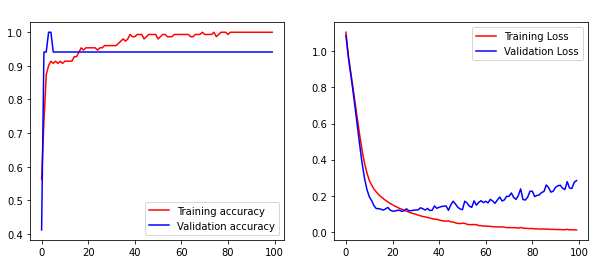

In [10]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label = 'Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label = 'Training Loss')
    plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()


In [12]:
pred = model.predict(X_test)
y_pred = [np.argmax(y, axis=None, out=None) for y in pred]
y_test = np.array(y_test)

print(y_pred)
print(y_test)
print()

acc = np.sum(y_pred == y_test) / X_test.shape[0]
print(acc)


2/2 [==============================] - 0s 2ms/step
[0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2]
[0 2 1 2 0 2 0 2 0 2 1 2 2 1 0 1 2 0 2 1 1 0 2 1 1 2 0 1 0 2 2 0 1 0 1 1 2
 1 1 2 2 2]

0.9523809523809523
